# Climate Data for Kennicott Glacier 2016 - 2021

## Tristan Amaral
## Edited by Mike Loso 2021_11_10

## Air Temperature data from 5 sources as of 11/10/2021
### 1. Gates Glacier (NPS IRMA)
### 2. May Creek (BLM station)
### 3. Pascal Buri AWS (lower Kennicott)
### 4. USGS Gage on Kennicott River
### 5. NWS coop observer in McCarthy

#### Data sources all feature gaps and are not all continuous throughout the four year period of investigation. Data were read into python with pandas, briefly QC-ed for flagged values, gaps, and timezone conversions, then spliced into hourly and daily dataframes. 

In [3]:
# Imports 
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.plotting.register_matplotlib_converters()
from matplotlib.lines import Line2D
plt.style.use('ggplot')

# data folders (downloaded data in Raw_Climate_Records, formatted data in csv and pickle formats in DATA)
raw_data = r'/mnt/c/Users/MGLoso/Documents/software/KennGlacMet/Raw_Climate_Records'
format_data = r'/mnt/c/Users/MGLoso/Documents/software/KennGlacMet/DATA'

#%%
# --- Load Data
meta = pd.read_pickle(os.path.join(format_data,'temperature_meta.pickle'))
dd = pd.read_pickle(os.path.join(format_data,'daily_temperature_data.pickle'))
               

### Abbreviated metadata for each site

In [4]:
meta

,,el,lat,lon,ID
gates,0,1237.50,61.6028,-143.0131,USR0000AGAT
may,0,487.70,61.6028,-142.5844,USR0000AMAY
buri,0,606.00,61.4841,-142.9283,NaN
usgs,0,408.83,61.4332895824,-142.9446852347,NaN
coop,0,381.00,61.418,-142.9961,505757


In [ ]:
## Data are organized in a Pandas Dataframe of daily (TMIN, TAVG, TMAX) temperature data 
## with keys corresponding to each station's informal name. 

In [5]:
dd

gates                            may             \
                               TMIN      TAVG      TMAX       TMIN       TAVG   
2016-01-01 00:00:00-09:00 -4.500000 -1.430556  1.611111  -3.888889  -0.995370   
2016-01-02 00:00:00-09:00 -6.222222 -3.965278  1.500000 -11.666667  -5.185185   
2016-01-03 00:00:00-09:00 -6.888889 -5.541667 -3.777778 -16.111111 -12.013889   
2016-01-04 00:00:00-09:00 -3.888889 -1.189815  1.666667 -17.777778 -15.000000   
2016-01-05 00:00:00-09:00 -5.000000 -1.081019  1.833333 -23.883333 -21.503032   
...                             ...       ...       ...        ...        ...   
2020-07-09 00:00:00-08:00       NaN       NaN       NaN   2.222222  14.305556   
2020-07-10 00:00:00-08:00       NaN       NaN       NaN  10.000000  13.240741   
2020-07-11 00:00:00-08:00       NaN       NaN       NaN   8.333333  12.083333   
2020-07-12 00:00:00-08:00       NaN       NaN       NaN   3.888889  12.569444   
2020-07-13 00:00:00-08:00       NaN       NaN       NaN   7.777778  15.714286   

                                     buri           usgs           coop       \
                                TMAX TMIN TAVG TMAX TMIN TAVG TMAX TMAX TMIN   
2016-01-01 00:00:00-09:00   2.777778  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2016-01-02 00:00:00-09:00   0.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2016-01-03 00:00:00-09:00  -5.000000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2016-01-04 00:00:00-09:00 -11.666667  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2016-01-05 00:00:00-09:00 -18.332778  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...                              ...  ...  ...  ...  ...  ...  ...  ...  ...   
2020-07-09 00:00:00-08:00  22.777778  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2020-07-10 00:00:00-08:00  18.888889  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2020-07-11 00:00:00-08:00  17.222222  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2020-07-12 00:00:00-08:00  19.444444  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2020-07-13 00:00:00-08:00  20.555556  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                
                          TAVG  
2016-01-01 00:00:00-09:00  NaN  
2016-01-02 00:00:00-09:00  NaN  
2016-01-03 00:00:00-09:00  NaN  
2016-01-04 00:00:00-09:00  NaN  
2016-01-05 00:00:00-09:00  NaN  
...                        ...  
2020-07-09 00:00:00-08:00  NaN  
2020-07-10 00:00:00-08:00  NaN  
2020-07-11 00:00:00-08:00  NaN  
2020-07-12 00:00:00-08:00  NaN  
2020-07-13 00:00:00-08:00  NaN  

[1656 rows x 15 columns]

## Station data plotted over time to show periods of data existence and data gaps. This is just a quick plotting function meant to illustrate the timing of the data sets for daily or hourly dataframes.

In [2]:
def timesubplots(df):
    """Takes in dataframe with varying number of keys and plots each 
    temperature variable for each station (key). Assumes indexes are dates."""
    
    # get df dimensions and key names
    sites,vals = [],[]
    for key in df.keys():
        sites.append(key[0])
        vals.append(key[1])
    sites = pd.Series(sites).unique()
    vals = pd.Series(vals)
    vals = vals[vals!='TAVG'].unique()
    names = {'gates':'Gates Glacier','may':'May Creek','buri':'Buri AWS',
            'usgs': 'USGS Gage','coop': 'NWS Coop'}
    
    # plotting parameters
    fig,axs = plt.subplots(len(sites),1,sharex=True,figsize=(11,9))
    colors = ['mediumblue','indianred']
    
    # loop plotting
    for site,ax in zip(sites,axs): # for each subplot
        ax.set_title(names[site])
        for c,t in zip(colors,vals): # for each temp parameter
            ax.plot(df[site].index,df[site][t],color=c)

    # make labels
    ax = fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axes
    plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
    ax.set_xlabel('DATE', labelpad=10,size=16) # Use argument `labelpad` to move label downwards.
    ax.set_ylabel('Air Temperature (C)', labelpad=20,size=16)
    
    # legend
    lines = [Line2D([0],[0],color=colors[0],lw=3),
             Line2D([0],[0],color=colors[1],lw=3)]
    ax.legend(lines,['TMIN','TMAX'],loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.grid(True)
    plt.tight_layout(.1)
    plt.show()
    

In [ ]:
## The figure below illustrates periods of records for each station with temperature data. 

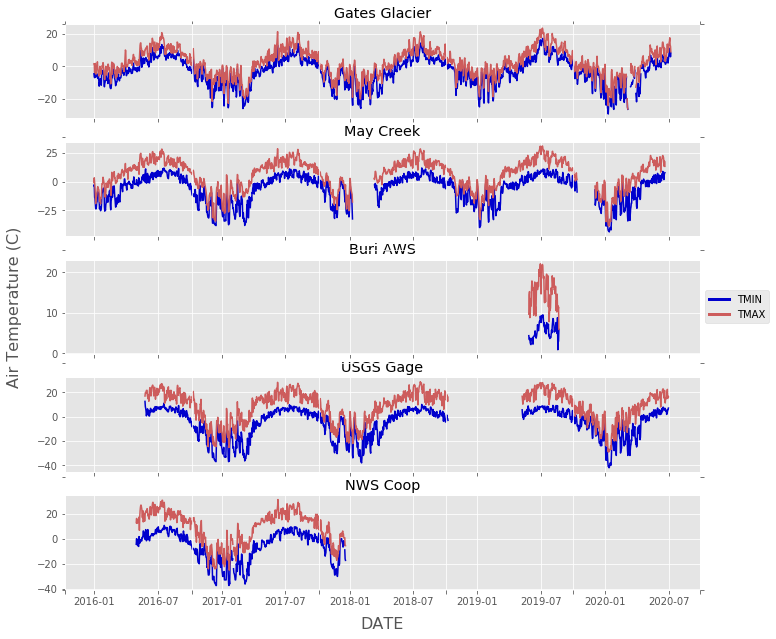

In [3]:
timesubplots(dd)

### With the exception of the NWS Coop station, all sites records hourly or sub-hourly temperature data. Fortunately, hourly lapse rates appear far too noisy for our purposes. Instead, I will focus on daily, monthly, and seasonaly averaged lapse rates for the purpose of extrapolating June and August/September temperatures to glacier stake sites.